# Data Cleaning Documentation: Audiobook Dataset

## Introduction
#### Overview of the Dataset

This dataset contains audiobook details, including attributes like the book's name, author, narrator, duration, release date, language, user ratings (stars), and price. The dataset is intended for analysis and machine learning applications, such as recommendation systems or price prediction models.

#### Purpose of Data Cleaning

Raw datasets often contain inconsistencies, missing values, and formatting errors that can affect analysis and model performance. This dataset requires data cleaning and preprocessing to ensure accuracy, consistency, and usability.

## Identified Issues

The dataset contains several inconsistencies that need to be addressed:

#### Incorrect Data Types

Dates and prices are stored as strings (objects) instead of datetime and float, respectively.
Stars (ratings) are numerical but stored as objects due to formatting issues.

#### String Contamination

The author and narrator columns include extra text such as "Written by" or "Narrated by", instead of just the names.

#### Mixed Format in Time Column

The time column includes both numbers and words (e.g., "10 hours 30 minutes" instead of a standard numeric format).


In [422]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [423]:
#Loading the dataset in the required format
df = pd.read_csv(r"D:\Data cleaning projects\archive (9)\audible_uncleaned.csv")

In [424]:
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [425]:
df.columns

Index(['name', 'author', 'narrator', 'time', 'releasedate', 'language',
       'stars', 'price'],
      dtype='object')

In [426]:
df.shape

(87489, 8)

In [427]:
#Checking the dataset for the count of null values in each column
df.isnull().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

In [428]:
#Checking the data types of each column to understand their formatting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


#### For better understanding, we will clean the dataset column by column from left to right in an orderly manner

In [429]:
df['name']

0                        Geronimo Stilton #11 & #12
1                                  The Burning Maze
2                                      The Deep End
3                              Daughter of the Deep
4        The Lightning Thief: Percy Jackson, Book 1
                            ...                    
87484                     Last Days of the Bus Club
87485                                      The Alps
87486                          The Innocents Abroad
87487                         A Sentimental Journey
87488                                        Havana
Name: name, Length: 87489, dtype: object

In [430]:
#Stripping extra spaces and converting names to title case for consistency
df['name'] = df['name'].str.strip().str.title()

In [431]:
df['author']

0        Writtenby:GeronimoStilton
1            Writtenby:RickRiordan
2             Writtenby:JeffKinney
3            Writtenby:RickRiordan
4            Writtenby:RickRiordan
                   ...            
87484       Writtenby:ChrisStewart
87485      Writtenby:StephenO'Shea
87486          Writtenby:MarkTwain
87487     Writtenby:LaurenceSterne
87488      Writtenby:MarkKurlansky
Name: author, Length: 87489, dtype: object

In [432]:
df['author'] = df['author'].str.replace(r'Writtenby:', '', regex=True)

In [433]:
df['author']

0        GeronimoStilton
1            RickRiordan
2             JeffKinney
3            RickRiordan
4            RickRiordan
              ...       
87484       ChrisStewart
87485      StephenO'Shea
87486          MarkTwain
87487     LaurenceSterne
87488      MarkKurlansky
Name: author, Length: 87489, dtype: object

In [434]:
df['narrator']

0            Narratedby:BillLobely
1         Narratedby:RobbieDaymond
2            Narratedby:DanRussell
3        Narratedby:SoneelaNankani
4        Narratedby:JesseBernstein
                   ...            
87484      Narratedby:ChrisStewart
87485        Narratedby:RobertFass
87486         Narratedby:FloGibson
87487       Narratedby:AntonLesser
87488       Narratedby:FleetCooper
Name: narrator, Length: 87489, dtype: object

In [435]:
df['narrator'] = df['narrator'].str.replace(r'Narratedby:', '', regex=True)

In [436]:
df['narrator']

0            BillLobely
1         RobbieDaymond
2            DanRussell
3        SoneelaNankani
4        JesseBernstein
              ...      
87484      ChrisStewart
87485        RobertFass
87486         FloGibson
87487       AntonLesser
87488       FleetCooper
Name: narrator, Length: 87489, dtype: object

In [437]:
df['time']

0         2 hrs and 20 mins
1         13 hrs and 8 mins
2          2 hrs and 3 mins
3        11 hrs and 16 mins
4                    10 hrs
                ...        
87484     7 hrs and 34 mins
87485     10 hrs and 7 mins
87486     19 hrs and 4 mins
87487      4 hrs and 8 mins
87488       6 hrs and 1 min
Name: time, Length: 87489, dtype: object

In [438]:
df['hours'] = df['time'].str.extract(r'(\d+) hrs')[0].astype(float).fillna(0)
df['minutes'] = df['time'].str.extract(r'(\d+) mins')[0].astype(float).fillna(0)

In [439]:
df['total_minutes'] = (df['hours'] * 60) + df['minutes']

In [440]:
print(df[['time', 'total_minutes']])

                     time  total_minutes
0       2 hrs and 20 mins          140.0
1       13 hrs and 8 mins          788.0
2        2 hrs and 3 mins          123.0
3      11 hrs and 16 mins          676.0
4                  10 hrs          600.0
...                   ...            ...
87484   7 hrs and 34 mins          454.0
87485   10 hrs and 7 mins          607.0
87486   19 hrs and 4 mins         1144.0
87487    4 hrs and 8 mins          248.0
87488     6 hrs and 1 min          360.0

[87489 rows x 2 columns]


In [441]:
print(df['stars'].value_counts())

stars
Not rated yet                    72417
5 out of 5 stars1 rating          3739
4 out of 5 stars1 rating          1254
5 out of 5 stars2 ratings          998
4.5 out of 5 stars2 ratings        661
                                 ...  
3.5 out of 5 stars61 ratings         1
5 out of 5 stars321 ratings          1
5 out of 5 stars93 ratings           1
4.5 out of 5 stars747 ratings        1
4 out of 5 stars76 ratings           1
Name: count, Length: 665, dtype: int64


In [442]:
df['releasedate'].dtype

dtype('O')

In [443]:
from datetime import datetime
df['releasedate'] = pd.to_datetime(df['releasedate'])

C:\Users\user\AppData\Local\Temp\ipykernel_1880\3768910821.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['releasedate'] = pd.to_datetime(df['releasedate'])


In [444]:
#The'releasedate'column has now been formatted to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           87489 non-null  object        
 1   author         87489 non-null  object        
 2   narrator       87489 non-null  object        
 3   time           87489 non-null  object        
 4   releasedate    87489 non-null  datetime64[ns]
 5   language       87489 non-null  object        
 6   stars          87489 non-null  object        
 7   price          87489 non-null  object        
 8   hours          87489 non-null  float64       
 9   minutes        87489 non-null  float64       
 10  total_minutes  87489 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 7.3+ MB


In [445]:
df['language'].value_counts()

language
English             61884
german               8295
spanish              3496
japanese             3167
italian              2694
french               2386
russian              1804
danish                935
portuguese            526
swedish               515
Hindi                 436
polish                224
finnish               197
dutch                 190
tamil                 161
catalan               153
mandarin_chinese       97
icelandic              52
romanian               50
hungarian              36
urdu                   34
afrikaans              28
czech                  23
turkish                20
greek                  18
arabic                 16
norwegian              16
galician               10
bulgarian               9
korean                  4
slovene                 4
hebrew                  2
basque                  2
telugu                  2
lithuanian              2
ukrainian               1
Name: count, dtype: int64

In [446]:
# Removing unnecessary spaces and converting language names to lowercase for consistency
df['language'] = df['language'].str.strip().str.lower()

In [447]:
df['language'].value_counts()

language
english             61884
german               8295
spanish              3496
japanese             3167
italian              2694
french               2386
russian              1804
danish                935
portuguese            526
swedish               515
hindi                 436
polish                224
finnish               197
dutch                 190
tamil                 161
catalan               153
mandarin_chinese       97
icelandic              52
romanian               50
hungarian              36
urdu                   34
afrikaans              28
czech                  23
turkish                20
greek                  18
arabic                 16
norwegian              16
galician               10
bulgarian               9
korean                  4
slovene                 4
hebrew                  2
basque                  2
telugu                  2
lithuanian              2
ukrainian               1
Name: count, dtype: int64

In [448]:
#Checking all rating values to clean and standardize them for better readability
print(df['stars'].value_counts().to_string())

stars
Not rated yet                      72417
5 out of 5 stars1 rating            3739
4 out of 5 stars1 rating            1254
5 out of 5 stars2 ratings            998
4.5 out of 5 stars2 ratings          661
4.5 out of 5 stars3 ratings          543
3 out of 5 stars1 rating             510
5 out of 5 stars4 ratings            407
5 out of 5 stars3 ratings            389
4 out of 5 stars2 ratings            328
4 out of 5 stars4 ratings            224
5 out of 5 stars5 ratings            207
4.5 out of 5 stars6 ratings          193
4.5 out of 5 stars7 ratings          175
4.5 out of 5 stars4 ratings          171
1 out of 5 stars1 rating             164
4.5 out of 5 stars5 ratings          158
2 out of 5 stars1 rating             155
5 out of 5 stars6 ratings            148
3.5 out of 5 stars2 ratings          146
4 out of 5 stars5 ratings            129
3 out of 5 stars2 ratings            122
4 out of 5 stars3 ratings            119
3.5 out of 5 stars3 ratings          109
4.5 out of

In [449]:
# Extracting numeric ratings from text and converting them to float for analysis
df['stars'] = df['stars'].str.extract(r'(\d+\.?\d*) out of 5 stars')[0].astype(float)

In [450]:
filtered_df = df[df['stars'].between(0,5, inclusive="both")]

In [451]:
#Extracted numerical ratings from text for further processing
print(len(filtered_df['stars']))

15072


In [452]:
#Replacing missing ratings with null values for better readability and consistency
df['stars'] = df['stars'].replace(to_replace='Not rated yet', value=np.nan)

In [453]:
df['stars'].value_counts().sum()

15072

In [454]:
#Identified entries where ratings were not provided
Not_rated_yet = 72417

In [455]:
total_lenth_of_rating = len(df['stars'])

In [456]:
total_lenth_of_rating

87489

In [457]:
#Validating if all ratings have been successfully extracted
87489-15072

72417

In [458]:
#The above values indicate entries where ratings were not provided, which we have converted accordingly

In [459]:
print(df['stars'].value_counts().to_string())

stars
5.0    6761
4.5    4046
4.0    2729
3.0     711
3.5     413
2.0     182
1.0     175
2.5      47
1.5       8


In [460]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [461]:
df['price'].dtype

dtype('float64')

In [462]:
df['price'].sum()

38069406.95

In [463]:
df['price'].mean()

487.9754784336346

In [464]:
df

,name,author,narrator,time,releasedate,language,stars,price,hours,minutes,total_minutes
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,2008-04-08,english,5.0,468.0,2.0,20.0,140.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,2018-01-05,english,4.5,820.0,13.0,8.0,788.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,2020-06-11,english,4.5,410.0,2.0,3.0,123.0
3,Daughter Of The Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,2021-05-10,english,4.5,615.0,11.0,16.0,676.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,2010-01-13,english,4.5,820.0,10.0,0.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...
87484,Last Days Of The Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,2017-09-03,english,NaN,596.0,7.0,34.0,454.0
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,2017-02-21,english,NaN,820.0,10.0,7.0,607.0
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,2016-12-30,english,NaN,938.0,19.0,4.0,1144.0
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,2011-02-23,english,NaN,680.0,4.0,8.0,248.0


In [465]:
df.describe()

,releasedate,stars,price,hours,minutes,total_minutes
count,87489,15072.00000,78015.000000,87489.00000,87489.000000,87489.000000
mean,2018-06-22 01:35:29.780886528,4.45694,487.975478,6.41268,28.103910,412.864737
min,1998-12-27 00:00:00,1.00000,11.000000,0.00000,0.000000,0.000000
25%,2016-08-30 00:00:00,4.00000,251.000000,2.00000,13.000000,142.000000
50%,2020-01-30 00:00:00,4.50000,501.000000,6.00000,27.000000,386.000000
75%,2021-08-04 00:00:00,5.00000,691.000000,9.00000,43.000000,584.000000
max,2025-11-14 00:00:00,5.00000,999.000000,143.00000,59.000000,8595.000000
std,NaN,0.72394,255.136687,6.13522,17.368985,369.108660


<Axes: >

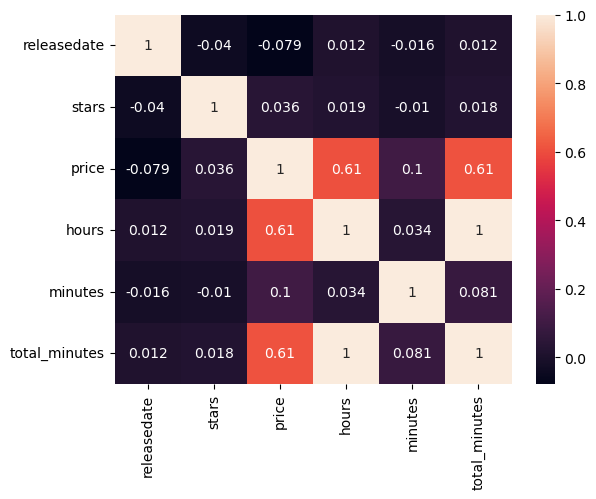

In [466]:
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           87489 non-null  object        
 1   author         87489 non-null  object        
 2   narrator       87489 non-null  object        
 3   time           87489 non-null  object        
 4   releasedate    87489 non-null  datetime64[ns]
 5   language       87489 non-null  object        
 6   stars          15072 non-null  float64       
 7   price          78015 non-null  float64       
 8   hours          87489 non-null  float64       
 9   minutes        87489 non-null  float64       
 10  total_minutes  87489 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 7.3+ MB
